### Load Required Packages and Data

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from bokeh.plotting import *
from bokeh.models import ColumnDataSource
import cPickle as pickle
import multiprocessing
import scipy.special
import ghalton
import numpy as np
import numpy.fft as fft
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')

In [3]:
from utils import clean,to_radian,hann,res_to_rad,ax_to_w,rep_to_angle
from Bessel_Interp import generate_halton_points
from rotation_2d import rot_cost_func, imrotate
from visualize import plot_cost_func, plot_cost_func_t,plot_volume
from cost_functions import cf_ssd
from mask import sphere_mask

In [4]:
axes_dict = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/for_cluster/axes_dict.p','rb'))
rot_axes = ['xz', 'y', 'yz', 'xy', 'x', 'z']
ax_to_idx = {}
for rot_ax in rot_axes:
    ax_to_idx[rot_ax] = rot_axes.index(rot_ax)
    
rot_axes_tricubic = ['x', 'y', 'z', 'xy', 'yz', 'xz']
ax_to_idx_tricubic = {}
for rot_ax in rot_axes_tricubic:
    ax_to_idx_tricubic[rot_ax] = rot_axes_tricubic.index(rot_ax)%3
print ax_to_idx_tricubic

{'xy': 0, 'xz': 2, 'yz': 1, 'y': 1, 'x': 0, 'z': 2}


In [ ]:
oct13_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_10.p','rb'))
oct13_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_8.p','rb'))
oct13_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_6_4.p','rb'))

# Rotations

In [5]:
from oct13_Bookeh import preprocess,load_pickle,split_plot,scatter_plot_cubic,scatter_plot,scatter_plot_all_linear,error_in_time,error_plot


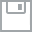
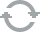
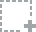
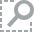
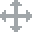
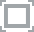
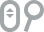
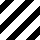
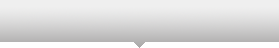
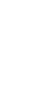
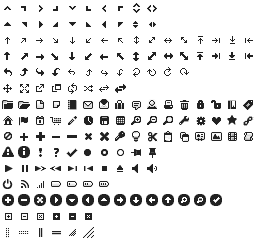
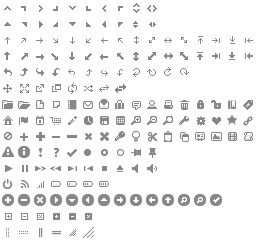
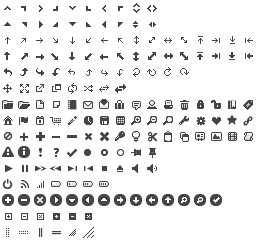
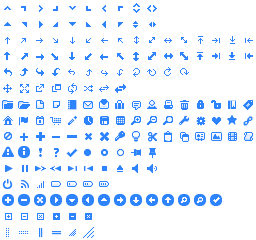
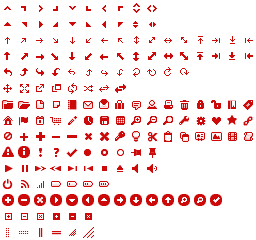
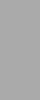
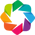
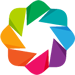

In [6]:
# # Tricubic Interpolation Results all together
cost_dict_10 = load_pickle('10','xyz')
cost_dict_10_1 = load_pickle('10','xyyzxz')

cost_dict_8 = load_pickle('8','xyz')
cost_dict_8_1 = load_pickle('8','xyyzxz')

cost_dict_6_4 = load_pickle('6_4','xyz')
cost_dict_6_4_1 = load_pickle('6_4','xyyzxz')

x = np.arange(0,7)
yl = x-0.1
yu = x+0.1

# plt.plot(x,yl,'black',ls='--',alpha = 0.5)
# plt.plot(x,yu,'black',ls='--',alpha = 0.5)
output_notebook()
TOOLS = "resize,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"
p1 = figure(tools = TOOLS, title='Search Results for 10mm Resolution', x_axis_label='True Rotations (Degrees)', 
            y_axis_label='Search Results from Registration (Degrees)')
p1.line([0,6],[0,6],line_width=2)
scatter_plot_cubic(p1, cost_dict_10, '10mm', ['x','y','z'], 0.01,ax_to_idx_tricubic)
scatter_plot_cubic(p1, cost_dict_10_1, '10mm', ['xy','yz','xz'], 0.01,ax_to_idx_tricubic)
show(p1)
# plt.subplot(1,3,2)
# plt.plot(x,yl,'black',ls='--',alpha = 0.5)
# plt.plot(x,yu,'black',ls='--',alpha = 0.5)
p2 = figure(tools = TOOLS, title='Search Results for 8mm Resolution', x_axis_label='True Rotations (Degrees)', 
            y_axis_label='Search Results from Registration (Degrees)')
p2.line([0,6],[0,6],line_width=2)
scatter_plot_cubic(p2, cost_dict_8, '8mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(p2, cost_dict_8_1, '8mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
show(p2)
# plt.subplot(1,3,3)
# plt.plot(x,yl,'black',ls='--',alpha = 0.5)
# plt.plot(x,yu,'black',ls='--',alpha = 0.5)
p3 = figure(tools = TOOLS, title='Search Results for 6.4mm Resolution', x_axis_label='True Rotations (Degrees)', 
            y_axis_label='Search Results from Registration (Degrees)')
p3.line([0,6],[0,6],line_width=2)
scatter_plot_cubic(p3, cost_dict_6_4, '6.4mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(p3, cost_dict_6_4_1, '6.4mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
show(p3)
#plt.show()


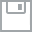
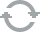
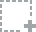
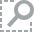
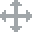
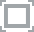
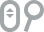
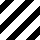
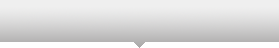
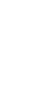
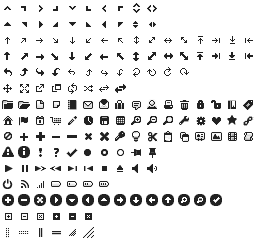
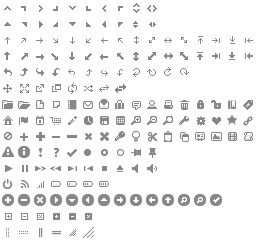
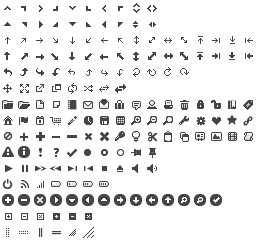
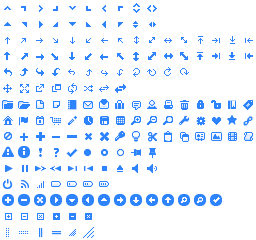
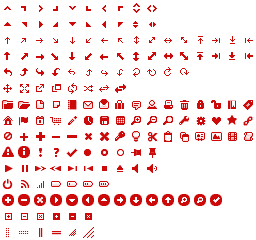
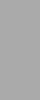
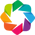
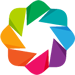

In [7]:
# # Tricubic Interpolation Results all together
cost_dict_10_filtered = load_pickle('10','xyz',filtered=True)
cost_dict_10_1_filtered = load_pickle('10','xyyzxz',filtered=True)

cost_dict_8_filtered = load_pickle('8','xyz',filtered=True)
cost_dict_8_1_filtered = load_pickle('8','xyyzxz',filtered=True)

cost_dict_6_4_filtered = load_pickle('6_4','xyz',filtered=True)
cost_dict_6_4_1_filtered = load_pickle('6_4','xyyzxz',filtered=True)

x = np.arange(0,7)
yl = x-0.1
yu = x+0.1
output_notebook()
TOOLS = "resize,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"
p1 = figure(tools = TOOLS, title='Search Results for 10mm Resolution', x_axis_label='True Rotations (Degrees)', 
            y_axis_label='Search Results from Registration (Degrees)')
p1.line([0,6],[0,6],line_width=2)
scatter_plot_cubic(p1,cost_dict_10_filtered, '10mm', ['x','y','z'], 0.01,ax_to_idx_tricubic)
scatter_plot_cubic(p1,cost_dict_10_1_filtered, '10mm', ['xy','yz','xz'], 0.01,ax_to_idx_tricubic)
show(p1)
p2 = figure(tools = TOOLS, title='Search Results for 8mm Resolution', x_axis_label='True Rotations (Degrees)', 
            y_axis_label='Search Results from Registration (Degrees)')
p2.line([0,6],[0,6],line_width=2)
scatter_plot_cubic(p2,cost_dict_8_filtered, '8mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(p2,cost_dict_8_1_filtered, '8mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
show(p2)
p3 = figure(tools = TOOLS, title='Search Results for 6.4mm Resolution', x_axis_label='True Rotations (Degrees)', 
            y_axis_label='Search Results from Registration (Degrees)')
p3.line([0,6],[0,6],line_width=2)
scatter_plot_cubic(p3,cost_dict_6_4_filtered, '6.4mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(p3,cost_dict_6_4_1_filtered, '6.4mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
show(p3)

In [8]:
from oct13_Bookeh import scatter_plot_cubic1

In [9]:
cost_dict_5mm_trans_rot0= pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_tricubic_5mm_trans_rotation_0.p','rb'))
cost_dict_5mm_trans_rot1= pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_tricubic_5mm_trans_rotation_1.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
for idx, res in enumerate(resolutions):
    p = figure(tools = TOOLS, title='Search Results for 6.4mm Resolution', x_axis_label='True Rotations (Degrees)', 
            y_axis_label='Search Results from Registration (Degrees)')
    p.line([0,6],[0,6],line_width=2)
    cost_dict = {}
    cost_dict.update(cost_dict_5mm_trans_rot0[idx])
    cost_dict.update(cost_dict_5mm_trans_rot1[idx])
    scatter_plot_cubic1(p, cost_dict,res,axes_dict.keys(), 0.01,ax_to_idx_tricubic)
    show(p)

In [10]:
# Trilinear interpolation results
#10mm
cost_dict_10_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_linear_10_rotation.p','rb'))
# 8mm
cost_dict_8_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_linear_8_rotation.p','rb'))
#6.4mm
cost_dict_6_4_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_linear_6_4_rotation.p','rb'))

#scatter_plot_all_linear(['x','y','z','xy','yz','xz'], cost_dict_10_linear, cost_dict_8_linear, cost_dict_6_4_linear,[18,6])

In [11]:
# Trilinear interpolation results
#10mm
cost_dict_10_linear_filtered = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_filtered_linear_10_rotation.p','rb'))
# 8mm
cost_dict_8_linear_filtered = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_filtered_linear_8_rotation.p','rb'))
#6.4mm
cost_dict_6_4_linear_filtered = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_filtered_linear_6_4_rotation.p','rb'))

#scatter_plot_all_linear(['x','y','z','xy','yz','xz'], cost_dict_10_linear_filtered, cost_dict_8_linear_filtered, cost_dict_6_4_linear_filtered,[18,6])

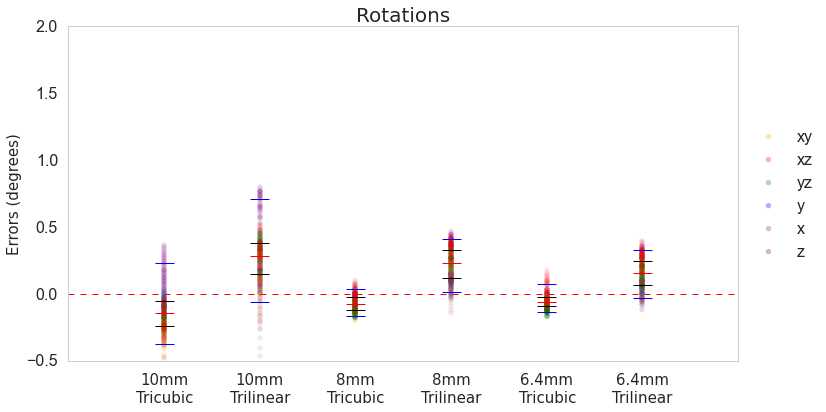

In [69]:
# error plot with quantiles
error_plot_rotations2([12,6])

In [37]:
# error plot with 
error_plot_rotations3([12,6])

AttributeError: unexpected attribute 'ticks' to CategoricalTicker, possible attributes are desired_num_ticks, name, num_minor_ticks, session or tags

In [36]:
# plotting quantiles
from bokeh.models import FixedTicker,CategoricalTickFormatter, CategoricalTicker 
def error_plot_rotations3(figsize):
    output_file("Rotation_Scatter.html")
    colors = ['red','blue','green','orange','brown','purple']
    quantile_colors = ['blue','black','red','black','blue']
    x = np.arange(1,7)
    labels = ['10mm\nx,y,xy','10mm\nz,xz,yz',
              '8mm\nx,y,xy','8mm\nz,xz,yz',
              '6.4mm\nx,y,xy','6.4mm\nz,xz,yz']
    p = figure(tools = TOOLS, title='Rotations', y_axis_label='Errors (Degrees)')
    #p.line([0,6],[0,6],line_width=2)
    p.xaxis[0].ticker=FixedTicker(ticks=label)
    p.xaxis[0].formatter = CategoricalTickFormatter()
    #plt.xticks(x, labels, rotation='horizontal',fontsize=15)
#     for rot_ax in axes_dict.keys():
#         plt.scatter(-3, -3, lw=0,s = 30, c = colors[ax_to_idx[rot_ax]],alpha = 0.3,marker='o' , label=rot_ax)
    
    e1=error_plot(p,cost_dict_10_filtered,1,'10mm',0.01, ['x','y'], ax_to_idx_tricubic)
    e2=error_plot(p,cost_dict_10_1_filtered,1,'10mm',0.01, ['xy'], ax_to_idx_tricubic)
    p.multi_line(list(np.array([[1-0.1,1+0.1]]*5)),
                 list(np.percentile(np.array([e1+e2]),[5,5,25,25,50,50,75,75,95,95]).reshape(5,2)),
                 line_width=1,color=quantile_colors)
    
    e3=error_plot(p,cost_dict_10_filtered,2,'10mm',0.01, ['z'], ax_to_idx_tricubic)
    e4=error_plot(p,cost_dict_10_1_filtered,2,'10mm',0.01, ['yz','xz'], ax_to_idx_tricubic)
    p.multi_line(list(np.array([[2-0.1,2+0.1]]*5)),
                 list(np.percentile(np.array([e3+e4]),[5,5,25,25,50,50,75,75,95,95]).reshape(5,2)),
                 line_width=1,color=quantile_colors)
    
    e5=error_plot(p,cost_dict_8_filtered,3,'8mm',0.01, ['x','y'], ax_to_idx_tricubic)
    e6=error_plot(p,cost_dict_8_1_filtered,3,'8mm',0.01, ['xy'], ax_to_idx_tricubic)
    p.multi_line(list(np.array([[3-0.1,3+0.1]]*5)),
                 list(np.percentile(np.array([e5+e6]),[5,5,25,25,50,50,75,75,95,95]).reshape(5,2)),
                 line_width=1,color=quantile_colors)

    e7=error_plot(p,cost_dict_8_filtered,4,'8mm',0.01, ['z'], ax_to_idx_tricubic)
    e8=error_plot(p,cost_dict_8_1_filtered,4,'8mm',0.01, ['yz','xz'], ax_to_idx_tricubic)
    p.multi_line(list(np.array([[4-0.1,4+0.1]]*5)),
                 list(np.percentile(np.array([e7+e8]),[5,5,25,25,50,50,75,75,95,95]).reshape(5,2)),
                 line_width=1,color=quantile_colors)
    
    e9=error_plot(p,cost_dict_6_4_filtered,5,'6.4mm',0.01, ['x','y'], ax_to_idx_tricubic)
    e10=error_plot(p,cost_dict_6_4_1_filtered,5,'6.4mm',0.01, ['xy'], ax_to_idx_tricubic)
    p.multi_line(list(np.array([[5-0.1,5+0.1]]*5)),
                 list(np.percentile(np.array([e9+e10]),[5,5,25,25,50,50,75,75,95,95]).reshape(5,2)),
                 line_width=1,color=quantile_colors)
    
    e11=error_plot(p,cost_dict_6_4_filtered,6,'6.4mm',0.01, ['z'], ax_to_idx_tricubic)
    e12=error_plot(p,cost_dict_6_4_1_filtered,6,'6.4mm',0.01, ['yz','xz'], ax_to_idx_tricubic)
    p.multi_line(list(np.array([[6-0.1,6+0.1]]*5)),
                 list(np.percentile(np.array([e11+e12]),[5,5,25,25,50,50,75,75,95,95]).reshape(5,2)),
                 line_width=1,color=quantile_colors)
    
    #p.multi_line([0,7],[0,0],color = 'red',line_width=1)
    show(p)

In [68]:
# plotting quantiles
def error_plot_rotations2(figsize):
    colors = ['red','blue','green','orange','brown','purple']
    quantile_colors = ['blue','black','red','black','blue']
    x = np.arange(1,7)
    labels = ['10mm\nTricubic','10mm\nTrilinear',
              '8mm\nTricubic','8mm\nTrilinear',
              '6.4mm\nTricubic','6.4mm\nTrilinear']
    plt.figure(figsize = figsize)
    plt.xticks(x, labels, rotation='horizontal',fontsize=15)
    for rot_ax in axes_dict.keys():
        plt.scatter(-3, -3, lw=0,s = 30, c = colors[ax_to_idx[rot_ax]],alpha = 0.3,marker='o' , label=rot_ax)
    
    e1=error_plot(cost_dict_10_filtered,1,'10mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    e2=error_plot(cost_dict_10_1_filtered,1,'10mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    plt.hlines(np.percentile(np.array(e1+e2),[5,25,50,75,95]),1-0.1,1+0.1,lw=1,color=quantile_colors)
    
    e3=error_plot(cost_dict_10_linear_filtered,2,'10mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    plt.hlines(np.percentile(np.array(e3),[5,25,50,75,95]),2-0.1,2+0.1,lw=1,color=quantile_colors)
    
    e4=error_plot(cost_dict_8_filtered,3,'8mm',0.01, ['x','y'], ax_to_idx_tricubic)
    e5=error_plot(cost_dict_8_1_filtered,3,'8mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    plt.hlines(np.percentile(np.array(e4+e5),[5,25,50,75,95]),3-0.1,3+0.1,lw=1,color=quantile_colors)

    e6=error_plot(cost_dict_8_linear_filtered,4,'8mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    plt.hlines(np.percentile(np.array(e6),[5,25,50,75,95]),4-0.1,4+0.1,lw=1,color=quantile_colors)
    
    e7=error_plot(cost_dict_6_4_filtered,5,'6.4mm',0.01, ['x','y'], ax_to_idx_tricubic)
    e8=error_plot(cost_dict_6_4_1_filtered,5,'6.4mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    plt.hlines(np.percentile(np.array(e7+e8),[5,25,50,75,95]),5-0.1,5+0.1,lw=1,color=quantile_colors)
    
    e9=error_plot(cost_dict_6_4_linear_filtered,6,'6.4mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    plt.hlines(np.percentile(np.array(e9),[5,25,50,75,95]),6-0.1,6+0.1,lw=1,color=quantile_colors)
    
    plt.hlines(0,0,7,color = 'r',lw=1,linestyle='--')
    plt.xlim([0,7])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid('off')
    plt.show()

In [19]:
def error_plot_rotations1(figsize):
    colors = ['red','blue','green','orange','brown','purple']
    quantile_colors = ['blue','black','red','black','blue']
    x = np.arange(1,13)
    labels = ['10mm\nCubic','10mm\nCubic\nFiltered','10mm\nLinear','10mm\nLinear\nFiltered',
              '8mm\nCubic','8mm\nCubic\nFiltered','8mm\nLinear','8mm\nLinear\nFiltered',
              '6.4mm\nCubic','6.4mm\nCubic\nFiltered','6.4mm\nLinear','6.4mm\nLinear\nFiltered']
    plt.figure(figsize = figsize)
    plt.xticks(x, labels, rotation='horizontal',fontsize=15)
    for rot_ax in axes_dict.keys():
        plt.scatter(-3, -3, lw=0,s = 30, c = colors[ax_to_idx[rot_ax]],alpha = 0.3,marker='o' , label=rot_ax)
    means = []
    stds = []
    e1=error_plot(cost_dict_10,1,'10mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    e2=error_plot(cost_dict_10_1,1,'10mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    means.append(np.sqrt(np.mean(np.array(e1+e2)**2)))
    stds.append(np.sqrt(np.std(np.array(e1+e2)**2)))
    print 'RMS for 10mm cubic: ',np.sqrt(np.mean(np.array(e1+e2)**2))
    
    e3=error_plot(cost_dict_10_filtered,2,'10mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    e4=error_plot(cost_dict_10_1_filtered,2,'10mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    means.append(np.sqrt(np.mean(np.array(e3+e4)**2)))
    stds.append(np.sqrt(np.std(np.array(e3+e4)**2)))
    print 'RMS for 10mm cubic filtered: ',np.sqrt(np.mean(np.array(e3+e4)**2))
    
    e5=error_plot(cost_dict_10_linear,3,'10mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    means.append(np.sqrt(np.mean(np.array(e5)**2)))
    stds.append(np.sqrt(np.std(np.array(e5)**2)))
    print 'RMS for 10mm linear: ',np.sqrt(np.mean(np.array(e5)**2))
    
    e6=error_plot(cost_dict_10_linear_filtered,4,'10mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    means.append(np.sqrt(np.mean(np.array(e6)**2)))
    stds.append(np.sqrt(np.std(np.array(e6)**2)))
    print 'RMS for 10mm linear filtered: ',np.sqrt(np.mean(np.array(e6)**2))
    
    e7=error_plot(cost_dict_8,5,'8mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    e8=error_plot(cost_dict_8_1,5,'8mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    means.append(np.sqrt(np.mean(np.array(e7+e8)**2)))
    stds.append(np.sqrt(np.std(np.array(e7+e8)**2)))
    print 'RMS for 8mm cubic: ',np.sqrt(np.mean(np.array(e7+e8)**2))
    
    e9=error_plot(cost_dict_8_filtered,6,'8mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    e10=error_plot(cost_dict_8_1_filtered,6,'8mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    means.append(np.sqrt(np.mean(np.array(e9+e10)**2)))
    stds.append(np.sqrt(np.std(np.array(e9+e10)**2)))
    print 'RMS for 8mm cubic filtered: ',np.sqrt(np.mean(np.array(e9+e10)**2))
    
    e11=error_plot(cost_dict_8_linear,7,'8mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    means.append(np.sqrt(np.mean(np.array(e11)**2)))
    stds.append(np.sqrt(np.std(np.array(e11)**2)))
    print 'RMS for 8mm linear: ',np.sqrt(np.mean(np.array(e11)**2))
    
    e12=error_plot(cost_dict_8_linear_filtered,8,'8mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    means.append(np.sqrt(np.mean(np.array(e12)**2)))
    stds.append(np.sqrt(np.std(np.array(e12)**2)))
    print 'RMS for 8mm linear filtered: ',np.sqrt(np.mean(np.array(e12)**2))
    
    e13=error_plot(cost_dict_6_4,9,'6.4mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    e14=error_plot(cost_dict_6_4_1,9,'6.4mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    means.append(np.sqrt(np.mean(np.array(e13+e14)**2)))
    stds.append(np.sqrt(np.std(np.array(e13+e14)**2)))
    print 'RMS 6.4mm cubic: ',np.sqrt(np.mean(np.array(e13+e14)**2))
    
    e15=error_plot(cost_dict_6_4_filtered,10,'6.4mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    e16=error_plot(cost_dict_6_4_1_filtered,10,'6.4mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    means.append(np.sqrt(np.mean(np.array(e15+e16)**2)))
    stds.append(np.sqrt(np.std(np.array(e15+e16)**2)))
    print 'RMS 6.4mm cubic filtered: ',np.sqrt(np.mean(np.array(e15+e16)**2))
    
    e17=error_plot(cost_dict_6_4_linear,11,'6.4mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    means.append(np.sqrt(np.mean(np.array(e17)**2)))
    stds.append(np.sqrt(np.std(np.array(e17)**2)))
    print 'RMS 6.4mm linear: ',np.sqrt(np.mean(np.array(e17)**2))
    e18=error_plot(cost_dict_6_4_linear_filtered,12,'6.4mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    means.append(np.sqrt(np.mean(np.array(e18)**2)))
    stds.append(np.sqrt(np.std(np.array(e18)**2)))
    print 'RMS for 6.4mm linear filtered: ',np.sqrt(np.mean(np.array(e18)**2))
    plt.hlines(0,0,13,color = 'r',linestyle='--')
    plt.xlim([0,13])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    plt.figure(figsize = figsize)
    plt.xticks(x, labels, rotation='horizontal',fontsize=15) 
    plt.errorbar(x, means, yerr=stds, fmt='o')
    plt.hlines(0,0,13,color = 'r',linestyle='--')
    plt.xlim([0,13])
    plt.ylabel('RMS Error',fontsize=15)
    plt.title('RMS Error for Rotations',fontsize=20)

In [28]:
def error_plot_rotations(figsize):
    colors = ['red','blue','green','orange','brown','purple']
    x = np.arange(1,7)
    labels = ['10mm\nCubic\nFiltered','10mm\nLinear\nFiltered',
              '8mm\nCubic\nFiltered','8mm\nLinear\nFiltered',
              '6.4mm\nCubic\nFiltered','6.4mm\nLinear\nFiltered']
    plt.figure(figsize = figsize)
    plt.xticks(x, labels, rotation='horizontal',fontsize=15)
    for rot_ax in axes_dict.keys():
        plt.scatter(-3, -3, lw=0,s = 30, c = colors[ax_to_idx[rot_ax]],alpha = 0.3,marker='o' , label=rot_ax)
    means = []
    stds = []
    e3=error_plot(cost_dict_10_filtered,1,'10mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    e4=error_plot(cost_dict_10_1_filtered,1,'10mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    means.append(np.sqrt(np.mean(np.array(e3+e4)**2)))
    stds.append(np.sqrt(np.std(np.array(e3+e4)**2)))
    print 'RMS for 10mm cubic filtered: ',np.sqrt(np.mean(np.array(e3+e4)**2))
    
    e6=error_plot(cost_dict_10_linear_filtered,2,'10mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    means.append(np.sqrt(np.mean(np.array(e6)**2)))
    stds.append(np.sqrt(np.std(np.array(e6)**2)))
    print 'RMS for 10mm linear filtered: ',np.sqrt(np.mean(np.array(e6)**2))
    
    e9=error_plot(cost_dict_8_filtered,3,'8mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    e10=error_plot(cost_dict_8_1_filtered,3,'8mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    means.append(np.sqrt(np.mean(np.array(e9+e10)**2)))
    stds.append(np.sqrt(np.std(np.array(e9+e10)**2)))
    print 'RMS for 8mm cubic filtered: ',np.sqrt(np.mean(np.array(e9+e10)**2))
    
    e12=error_plot(cost_dict_8_linear_filtered,4,'8mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    means.append(np.sqrt(np.mean(np.array(e12)**2)))
    stds.append(np.sqrt(np.std(np.array(e12)**2)))
    print 'RMS for 8mm linear filtered: ',np.sqrt(np.mean(np.array(e12)**2))
    
    e15=error_plot(cost_dict_6_4_filtered,5,'6.4mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    e16=error_plot(cost_dict_6_4_1_filtered,5,'6.4mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    means.append(np.sqrt(np.mean(np.array(e15+e16)**2)))
    stds.append(np.sqrt(np.std(np.array(e15+e16)**2)))
    print 'RMS 6.4mm cubic filtered: ',np.sqrt(np.mean(np.array(e15+e16)**2))
    
    e18=error_plot(cost_dict_6_4_linear_filtered,6,'6.4mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    means.append(np.sqrt(np.mean(np.array(e18)**2)))
    stds.append(np.sqrt(np.std(np.array(e18)**2)))
    print 'RMS for 6.4mm linear filtered: ',np.sqrt(np.mean(np.array(e18)**2))
    plt.hlines(0,0,7,color = 'r',linestyle='--')
    plt.xlim([0,7])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    print len(means), len(stds)
    plt.figure(figsize = figsize)
    plt.xticks(x, labels, rotation='horizontal',fontsize=15) 
    plt.errorbar(x, means, yerr=stds, fmt='o')
    plt.hlines(0,0,7,color = 'r',linestyle='--')
    plt.xlim([0,7])
    plt.ylabel('RMS Error',fontsize=15)
    plt.title('RMS Error for Rotations',fontsize=20)

# Translations

In [49]:
from oct13_visualize import scatter_plot_all_trans, error_in_time_trans,error_plot_trans

In [65]:
def error_plot_translations(figsize):
    colors = ['red','blue','green','orange','brown','purple']
    x = [1,2,3,4,5,6]
    labels = ['10mm\nCubic','10mm\nLinear','8mm\nCubic','8mm\nLinear','6.4mm\nCubic','6.4mm\nLinear']
    plt.figure(figsize = figsize)
    plt.xticks(x, labels, rotation='horizontal',fontsize=15)
    for rot_ax in axes_dict.keys():
        plt.scatter(-5, -5, lw=0,s = 30, c = colors[ax_to_idx[rot_ax]],alpha = 0.3,marker='o' , label=rot_ax)
    error_plot_trans(cost_dict_10_trans,1,'10mm')
    error_plot_trans(cost_dict_10_trans_linear,2,'10mm')
    error_plot_trans(cost_dict_8_trans,3,'8mm')
    error_plot_trans(cost_dict_8_trans_linear,4,'8mm')
    error_plot_trans(cost_dict_6_4_trans,5,'6.4mm')
    error_plot_trans(cost_dict_6_4_trans_linear,6,'6.4mm')
    plt.hlines(0,0,12,color = 'r',linestyle='--')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

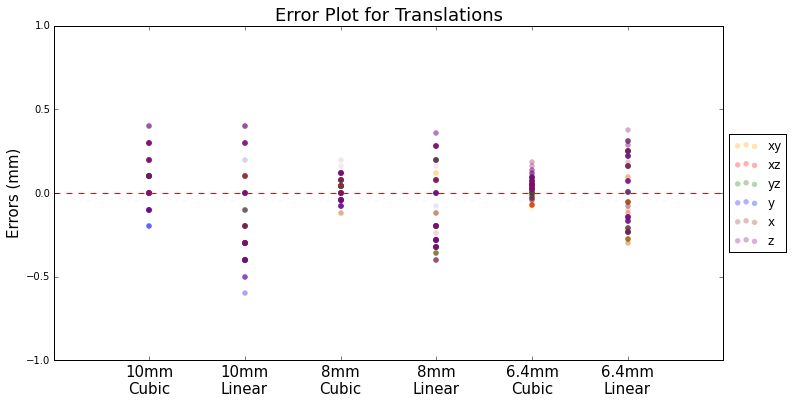

In [66]:
error_plot_translations([12,6])

In [34]:
from oct13_visualize import scatter_plot_trans1

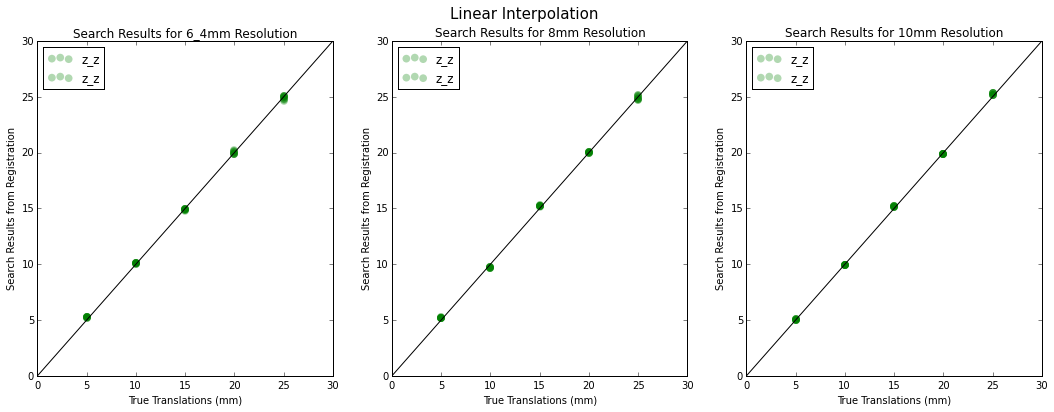

In [35]:
cost_trans_linear_nomask = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_5mm_trans_cost_trans_linear_nomask.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
plt.figure(figsize=[18,6])
for idx, res in enumerate(resolutions):
    cost = cost_trans_linear_nomask[res]
    plt.subplot(1,3,idx+1)
    scatter_plot_trans1(cost,res)
plt.suptitle('Linear Interpolation',fontsize=15)
plt.show()

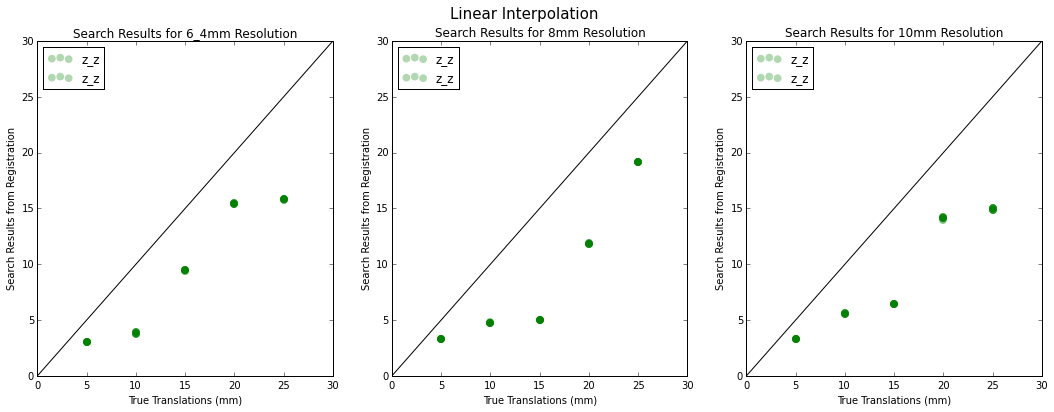

In [72]:
new_cost_trans_linear_nomask = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_5mm_trans_new_cost_trans_linear_nomask.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
plt.figure(figsize=[18,6])
for idx, res in enumerate(resolutions):
    cost = new_cost_trans_linear_nomask[res]
    plt.subplot(1,3,idx+1)
    scatter_plot_trans1(cost,res,1)
plt.suptitle('Linear Interpolation',fontsize=15)
plt.show()

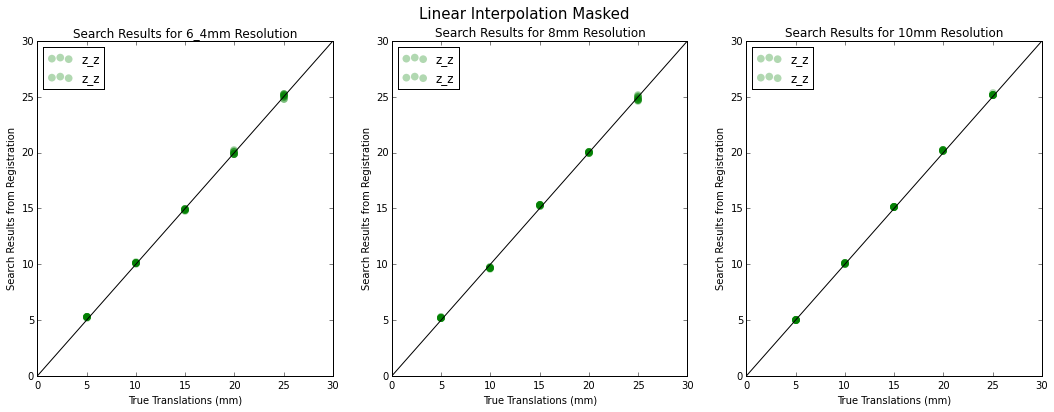

In [74]:
new_cost_trans_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_5mm_trans_new_cost_trans_linear.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
plt.figure(figsize=[18,6])
for idx, res in enumerate(resolutions):
    cost = new_cost_trans_linear[idx][res]
    plt.subplot(1,3,idx+1)
    scatter_plot_trans1(cost,res,1)
plt.suptitle('Linear Interpolation Masked',fontsize=15)
plt.show()

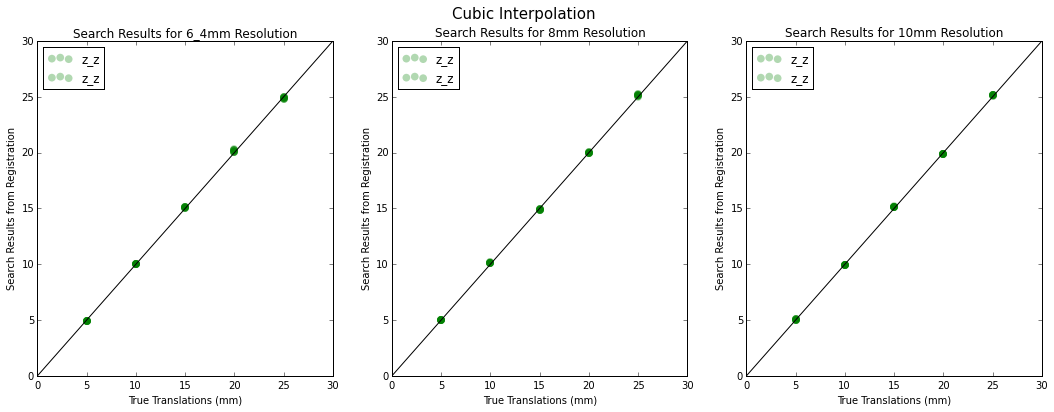

In [36]:
cost_trans_cubic_nomask = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_5mm_trans_cost_trans_cubic_nomask.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
plt.figure(figsize=[18,6])
for idx, res in enumerate(resolutions):
    cost = cost_trans_cubic_nomask[res]
    plt.subplot(1,3,idx+1)
    scatter_plot_trans1(cost,res)
plt.suptitle('Cubic Interpolation',fontsize=15)
plt.show()

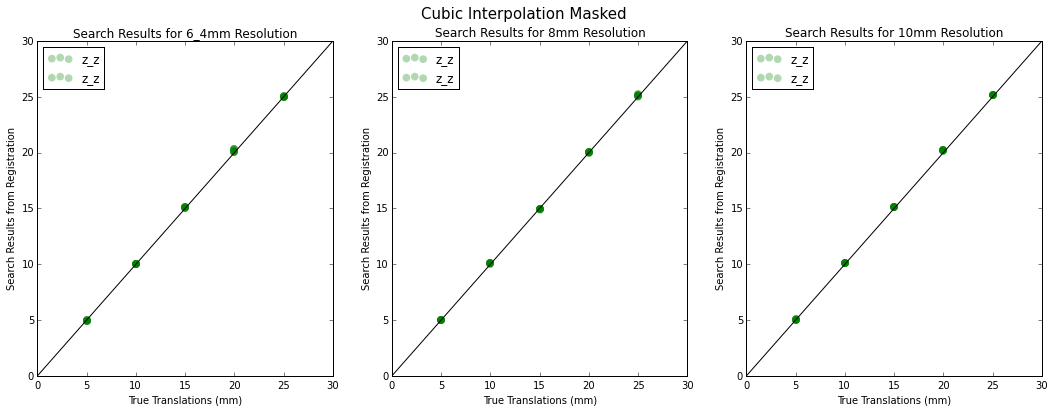

In [38]:
cost_trans_cubic = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_5mm_trans_cost_trans_cubic.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
plt.figure(figsize=[18,6])
for idx, res in enumerate(resolutions):
    cost = cost_trans_cubic[res]
    plt.subplot(1,3,idx+1)
    scatter_plot_trans1(cost,res)
plt.suptitle('Cubic Interpolation Masked',fontsize=15)
plt.show()

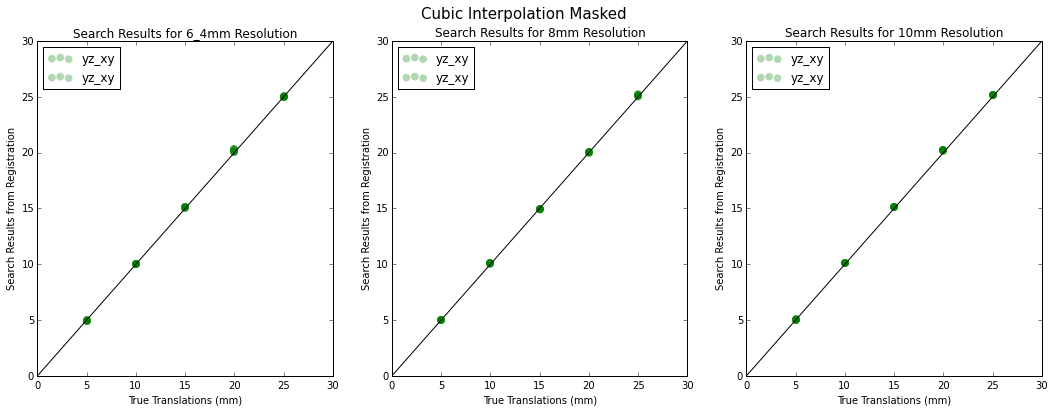

In [87]:
new_cost_trans_cubic = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_5mm_trans_new_cost_trans_cubic.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
plt.figure(figsize=[18,6])
for idx, res in enumerate(resolutions):
    cost = new_cost_trans_cubic[idx][res]
    plt.subplot(1,3,idx+1)
    scatter_plot_trans1(cost,res,1)
plt.suptitle('Cubic Interpolation Masked',fontsize=15)
plt.show()

In [107]:
from oct13_visualize import error_plot_trans1
def error_plot_5mm_trans(figsize):
    colors = ['red','blue','green','orange','brown','purple']
    x = [1,2,3,4,5,6]
    labels = ['6.4mm\nCubic','6.4mm\nRotated\nCubic','8mm\nCubic','8mm\nRotated\nCubic','10mm\nCubic','10mm\nRotated\nCubic']
    plt.figure(figsize = figsize)
    plt.xticks(x, labels, rotation='horizontal',fontsize=15)
    for rot_ax in axes_dict.keys():
        plt.scatter(-5, -5, lw=0,s = 30, c = colors[ax_to_idx[rot_ax]],alpha = 0.3,marker='o' , label=rot_ax)
    resolutions = ['6_4mm','8mm','10mm']
    for idx, res in enumerate(resolutions):
        error_plot_trans1(cost_trans_cubic[res],2*idx+1,'10mm')
        error_plot_trans1(new_cost_trans_cubic[idx][res],2*idx+2,'10mm')
    plt.hlines(0,0,12,color = 'r',linestyle='--')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

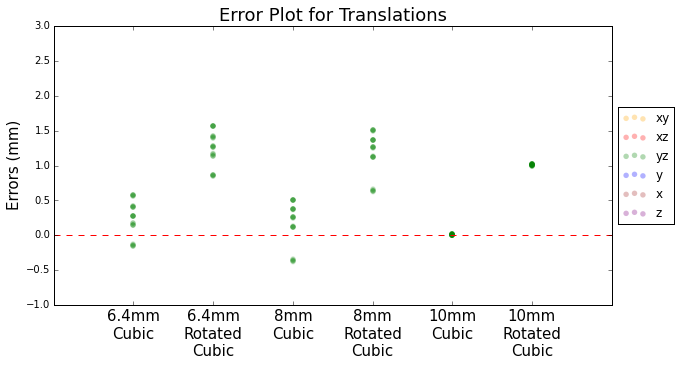

In [108]:
error_plot_5mm_trans([10,5])

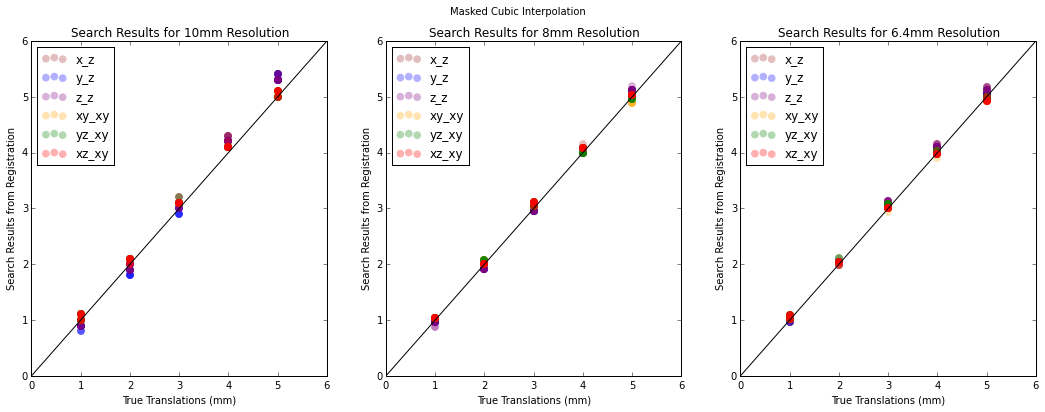

In [62]:
# Cubic With Mask
#10mm
cost_dict_10_trans = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_cost_trans_10.p','rb'))
# 8mm
cost_dict_8_trans = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_cost_trans_8.p','rb'))
#6.4mm
cost_dict_6_4_trans = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_cost_trans_6_4.p','rb'))
# Scatter Plot
scatter_plot_all_trans(['x','y','z','xy','yz','xz'], cost_dict_10_trans, cost_dict_8_trans, cost_dict_6_4_trans, [18,6],interp = 'Masked Cubic')

# for ax in ['x','y','z','xy','yz','xz']:
#     axes = [ax]
#     scatter_plot_all_trans(axes, cost_dict_10_trans, cost_dict_8_trans, cost_dict_6_4_trans, [18,6],interp='Masked Cubic')

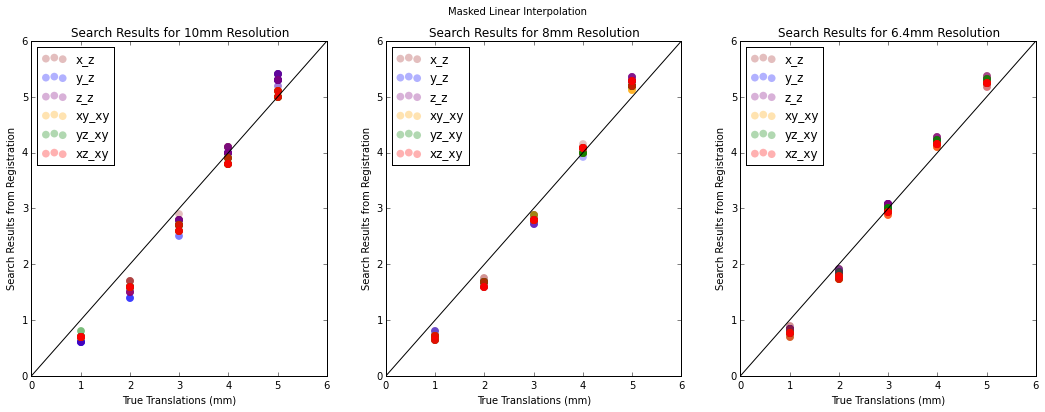

In [63]:
# Linear With Mask
#10mm
cost_dict_10_trans_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_cost_trans_linear_10.p','rb'))
# 8mm
cost_dict_8_trans_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_cost_trans_linear_8.p','rb'))
#6.4mm
cost_dict_6_4_trans_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_cost_trans_linear_6_4.p','rb'))

# Scatter Plot
scatter_plot_all_trans(['x','y','z','xy','yz','xz'], cost_dict_10_trans_linear, 
                       cost_dict_8_trans_linear, cost_dict_6_4_trans_linear, 
                       [18,6], interp = 'Masked Linear')

# for ax in ['x','y','z','xy','yz','xz']:
#     axes = [ax]
#     scatter_plot_all_trans(axes, cost_dict_10_trans_linear, cost_dict_8_trans_linear, cost_dict_6_4_trans_linear, [18,6])